In [62]:
##Mohsin Essani


import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as sil_score
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [4]:
# Load data
crime_data=pd.read_csv("crime_data.csv")

# Hierarchical Clustering 

In [5]:
# Prepare the data for clustering
X = crime_data.drop(['Country'], axis=1)

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='manhattan')
agg_clustering.fit(X)

# Get the cluster labels
labels = agg_clustering.labels_


In [6]:
#Using StandardScaler

scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(crime_data.iloc[:,1:5])


In [7]:

# Calculate the Silhouette score


silhouette = sil_score(crime_data_scaled, labels)
print("Silhouette Score: ", silhouette)



# calculate the adjusted rand index
ari = adjusted_rand_score(crime_data['Murder'], agg_clustering.labels_)
print("Adjusted Rand Index:", ari)

# calculate the Fowlkes-Mallows index
fmi = fowlkes_mallows_score(crime_data['Murder'], agg_clustering.labels_)
print("Fowlkes-Mallows Index:", fmi)

# calculate the Calinski-Harabasz index
chi = calinski_harabasz_score(crime_data_scaled, agg_clustering.labels_)
print("Calinski-Harabasz Index:", chi)

# calculate the Davies-Bouldin index
dbi = davies_bouldin_score(crime_data_scaled, agg_clustering.labels_)
print("Davies-Bouldin Index:", dbi)



Silhouette Score:  0.3178843328226182
Adjusted Rand Index: 0.0032594633646398628
Fowlkes-Mallows Index: 0.07241815037889603
Calinski-Harabasz Index: 26.517532680371524
Davies-Bouldin Index: 1.1505885220726406


As in the above observations, Hierarchical clustering is not the perfect choice for this type of dataset and now we will try KMeans and see whether we can improve the accuracy or not. 

(array([34., 16.]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

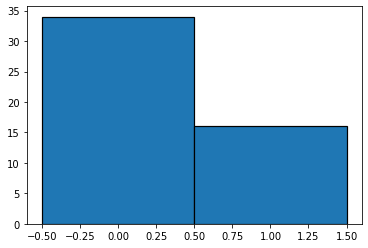

In [8]:
# Plot the distribution of the labels
plt.hist(labels, bins=np.arange(labels.min(), labels.max()+2)-0.5, 
         edgecolor='black', linewidth=1.2)


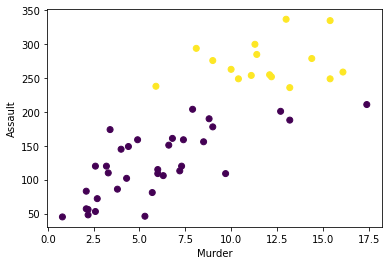

In [9]:
# Plot the data to visualize the clusters
plt.scatter(X['Murder'], X['Assault'], c=labels)
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()


# KMeans CLustering 


In [54]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2,random_state=30,max_iter=500)
kmeans.fit(crime_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [55]:
# Predict the cluster labels
labels = kmeans.labels_

In [56]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [57]:
#calculate the silhouette score
silhouette = sil_score(crime_data_scaled, labels)
print("Silhouette Score: ", silhouette)

# calculate the adjusted rand index
ari = adjusted_rand_score(crime_data['Murder'], kmeans.labels_)
print("Adjusted Rand Index:", ari)

# calculate the Fowlkes-Mallows index
fmi = fowlkes_mallows_score(crime_data['Murder'], kmeans.labels_)
print("Fowlkes-Mallows Index:", fmi)

# calculate the Calinski-Harabasz index
chi = calinski_harabasz_score(crime_data_scaled, kmeans.labels_)
print("Calinski-Harabasz Index:", chi)

# calculate the Davies-Bouldin index
dbi = davies_bouldin_score(crime_data_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", dbi)

# Calculate the Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)


Silhouette Score:  0.4084890326217641
Adjusted Rand Index: 0.010973936899862825
Fowlkes-Mallows Index: 0.10583005244258362
Calinski-Harabasz Index: 43.46199150301377
Davies-Bouldin Index: 0.9697186749933391
Inertia: 104.96163315756871


As seen in the above inference, accuracy is improved but yet not good for this dataset. We will try DBScan and try to improve more accuracy.

In [ ]:
# Plot the distribution of the labels
plt.hist(labels, bins=np.arange(labels.min(), labels.max()+2)-0.5, 
         edgecolor='black', linewidth=1.2)
plt.show()

In [ ]:

# Plot the scatter plot to visualize the clusters
plt.scatter(X["Murder"], X["Assault"], c=labels)
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.show()

# DBSCAN Algorithm

In [58]:

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil_score, adjusted_rand_score, fowlkes_mallows_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

# Load data into a pandas dataframe
data = pd.read_csv('crime_data.csv')
features = data.iloc[:, 1:]

# Scale the data to normalize it
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=2)
clusters = dbscan.fit_predict(features_scaled)


# Number of clusters formed
unique_labels = np.unique(clusters)
n_clusters = len(unique_labels)


In [59]:
# Silhouette score
from sklearn.metrics import silhouette_score

clusters = dbscan.labels_

if len(set(clusters)) > 1:
    silhouette_score = silhouette_score(features_scaled, clusters)
    print("Silhouette score:", silhouette_score)
else:
    print("Number of unique clusters is less than 2, silhouette score cannot be calculated")


# Adjusted Rand index

adjusted_rand_index = adjusted_rand_score(labels, clusters)
print("Adjusted Rand index:", adjusted_rand_index)

# Fowlkes-Mallows index
fowlkes_mallows_index = fowlkes_mallows_score(labels, clusters)
print("Fowlkes-Mallows index:", fowlkes_mallows_index)

# Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(crime_data_scaled, clusters)
print("Calinski-Harabasz index:", calinski_harabasz_index)

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(crime_data_scaled, clusters)
print("Davies-Bouldin index:", davies_bouldin_index)


Silhouette score: 0.08637454244810451
Adjusted Rand index: 0.32168754119973636
Fowlkes-Mallows index: 0.5805019002039105
Calinski-Harabasz index: 6.550438553986862
Davies-Bouldin index: 1.7091163755583256


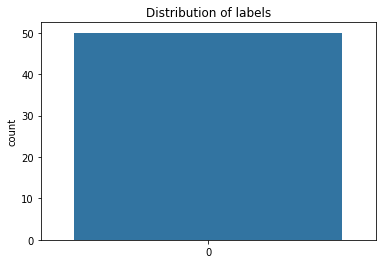

In [63]:
# Plot the distribution of labels
sns.countplot(clusters)
plt.title("Distribution of labels")
plt.show()



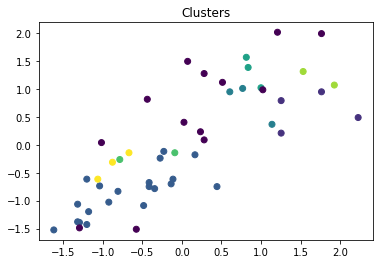

In [64]:
# Scatter plot to visualize the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters)
plt.title("Clusters")
plt.show()